   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3 

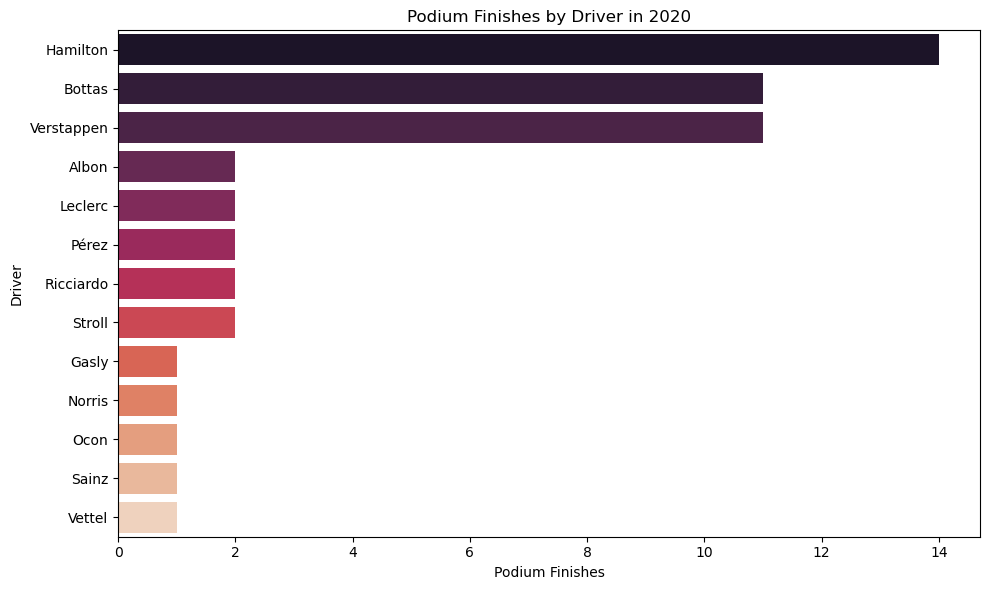

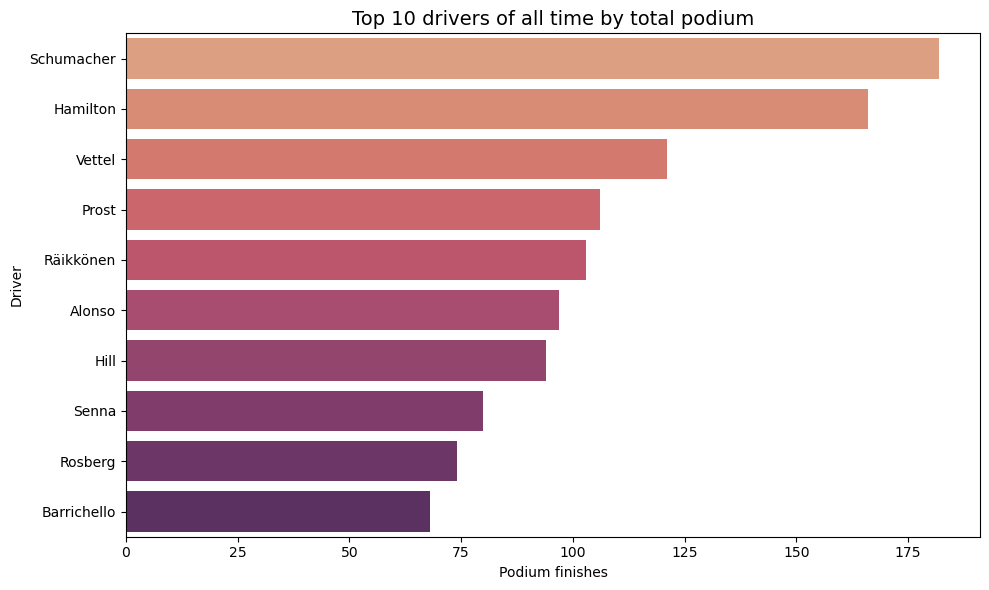

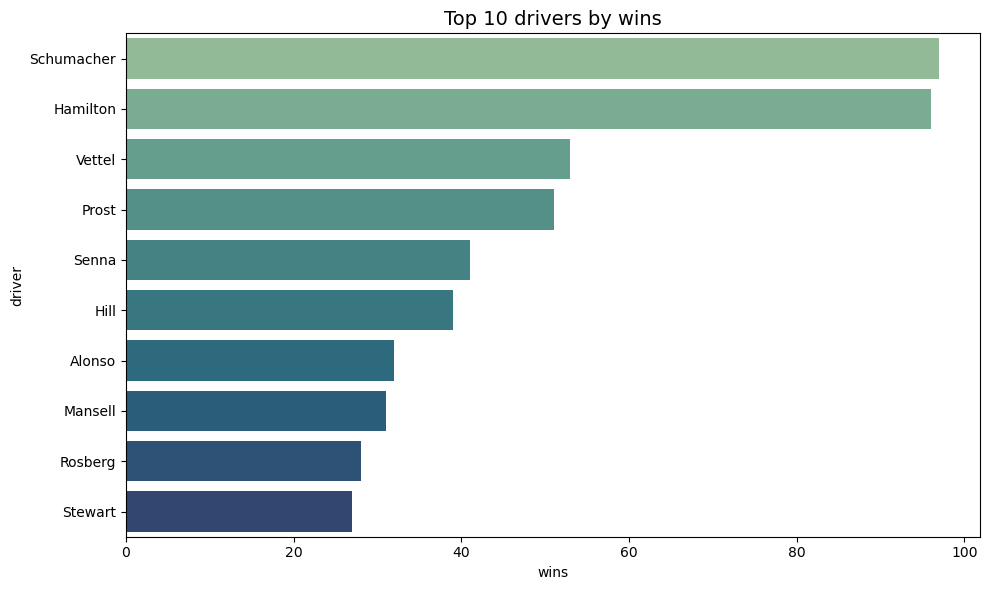

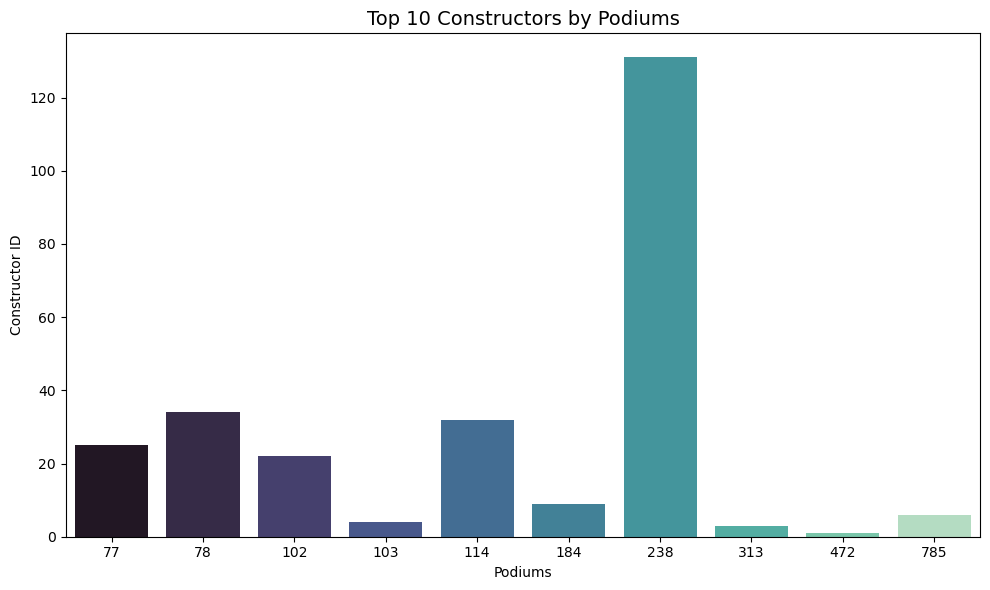


Confusion matrix:
 [[4257   82]
 [ 637   20]]

Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      4339
           1       0.20      0.03      0.05       657

    accuracy                           0.86      4996
   macro avg       0.53      0.51      0.49      4996
weighted avg       0.78      0.86      0.81      4996



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

results = pd.read_csv("results.csv")
print(results.head())
print(results.info())
print(results.describe())

races = pd.read_csv("races.csv")
print(races.head())
print(races.info())
print(races.describe())

drivers = pd.read_csv("drivers.csv")
print(drivers.head())
print(drivers.info())
print(drivers.describe())

df = results.merge(races[['raceId', 'year']], on= 'raceId')
df = df.merge(drivers[['driverId', 'surname']], on='driverId')
print(df.head())
print(df.info())

podium_df = df[df['positionOrder'].isin([1,2,3])]
podium_df.head(20)

pd.set_option('display.max_rows', None)
print(df['surname'].value_counts())

podium_counts = podium_df.groupby(['year', 'surname']).size().reset_index(name= 'podiums')
print(podium_counts.head())

year_to_plot = 2020
top_year = podium_counts[podium_counts['year']== year_to_plot].sort_values('podiums', ascending= False)
top_year.head()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_year, x='podiums', y='surname', palette='rocket')
plt.title(f'Podium Finishes by Driver in {year_to_plot}')
plt.xlabel('Podium Finishes')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

top_drivers_all_time = df[df['positionOrder'].isin([1,2,3])]
top_drivers_all_time = top_drivers_all_time['surname'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_drivers_all_time.values, y=top_drivers_all_time.index, palette='flare')
plt.title("Top 10 drivers of all time by total podium", fontsize= 14)
plt.xlabel("Podium finishes")
plt.ylabel("Driver")
plt.tight_layout()
plt.show()

wins = df[df['positionOrder']==1]
wins_by_driver = wins['surname'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x= wins_by_driver.values, y= wins_by_driver.index, palette= 'crest')
plt.title("Top 10 drivers by wins", fontsize= 14)
plt.xlabel('wins')
plt.ylabel('driver')
plt.tight_layout()
plt.show()

top_constructors = df[df['positionOrder'].isin([1, 2, 3])]
constructor_counts = top_constructors['constructorId'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=constructor_counts.values, y=constructor_counts.index, palette='mako')
plt.title('Top 10 Constructors by Podiums', fontsize=14)
plt.xlabel('Podiums')
plt.ylabel('Constructor ID')
plt.tight_layout()
plt.show()

results['on_podium']= df['positionOrder'].apply(lambda x: 1 if x in [1,2,3] else 0)
features= ['grid', 'constructorId', 'driverId', 'laps', 'points']
X= results[features]
y= results['on_podium']

scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state= 42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification_report:\n", classification_report(y_test, y_pred))